# OpenCV & FaceRecognition

По примеру
https://habr.com/ru/company/netologyru/blog/434354/

#Setup & Import

In [ ]:
pathName      = "/content/drive/My Drive/" 
pathNameData  = pathName + "Datasets/_Competitions/" 
pathNameData  = "/content/drive/My Drive/Datasets/_Competitions/" 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python
!pip install dlib

In [ ]:
!pip install face_recognition
!pip install ffmpeg-python

     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=63f8256749d37988c771d9ec371fb3cec8e000a2868b8d00b998f452ca3bf171
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import cv2
import sys
import matplotlib.pyplot as plt 
import numpy as np
import ffmpeg 
from IPython.display import clear_output
import base64
from IPython.display import HTML              
from IPython import display as ipythondisplay
from PIL import Image as im

try:
  import face_recognition
except RuntimeError:
  print("Error while calling cudaGetDevice. Switch  to GPU! \n ")
  sys.exit(1)

# Utils

In [ ]:
def info_video(path_in_filename):
  # вариант ffmpeg-python
  width, height, duration, num_frames, avg_frame_rate = None, None, None, None, None
  try:
    probe = ffmpeg.probe(path_in_filename)
    video_stream = next((stream for stream in probe['streams'] if stream['codec_type'] == 'video'), None)
    width = int(video_stream['width'])
    height = int(video_stream['height'])
    print(f"Информация о видеофайле: {path_in_filename}")
    num_frames = int(video_stream['nb_frames'])
    #print(video_stream)
    print("Характеристики файла:")
    print(f"Изображение: {width}x{height}, num_frames {num_frames}")
    try:
      duration = float(video_stream['duration'])
      print(f"Продолжительность - {duration}c, или {int(duration/60)} мин {int(duration)%60}с")
    except:
      pass
    #duration_ts = int(video_stream['duration_ts'])
    try:
      avg_frame_rate_str = str(video_stream["avg_frame_rate"])
      avg_frame_rate = int(avg_frame_rate_str[0:avg_frame_rate_str.find('/')])/int(avg_frame_rate_str[avg_frame_rate_str.find('/')+1:])
      print(f"Фреймов в секунду (avg_frame_rate): {avg_frame_rate:.0f}")
    except:
      pass
  except:
    print(f"Ошибка: файл '{path_in_filename}'\n - не МЕДИА-файл!'")
  return width, height, duration, num_frames, avg_frame_rate  

def convert_video(path_in_filename, path_out_filename):
  !ffmpeg -i '$path_in_filename' '$path_out_filename'
  #clear_output()  

def play_mp4(mp4_path):
  video = open(mp4_path, 'r+b').read()         # открываем в режиме чтения/записи бинарного файла
  encoded = base64.b64encode(video)       # кодируем видео в 64-разрядный код 
  ipythondisplay.display(HTML(data='''<video alt="test" autoplay loop controls style="height: 400px;">
    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
    </video>'''.format(encoded.decode('ascii'))))

def duration_by_frames(fname_out, frames_person_cnt):
  movie = cv2.VideoCapture(fname_out)
  frame_rate = movie.get(cv2.CAP_PROP_FPS)
  frames_cnt = movie.get(cv2.CAP_PROP_FRAME_COUNT)
  #print(frame_rate, frames_cnt)
  duration_sec_out = frames_person_cnt/frame_rate
  return duration_sec_out  

# Исходные параметры

In [ ]:
# Исходные параметры
path_name_data  = "/content/drive/My Drive/Datasets/_Competitions/" 
video_file_name = 'Shou_Trumana_Kinosimka.RU (online-video-cutter.com).mp4'
path_video = path_name_data + video_file_name
sample_img_file_name = "Jim_Carrey_01.jpg"
path_sample_img = path_name_data + sample_img_file_name
person_name = "Jim Carrey"

In [ ]:
# Информация о видеофайле
width, height, duration, num_frames, avg_frame_rate = info_video(path_name_data + video_file_name)

Информация о видеофайле: /content/drive/My Drive/Datasets/_Competitions/Shou_Trumana_Kinosimka.RU (online-video-cutter.com).mp4
Характеристики файла:
Изображение: 720x408, num_frames 29629
Продолжительность - 1235.777c, или 20 мин 35с
Фреймов в секунду (avg_frame_rate): 24


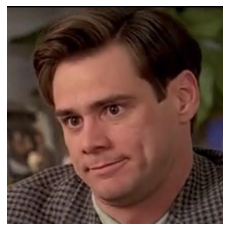

In [ ]:
# Исходная фотография
img = im.open(path_sample_img)
plt.imshow(img,cmap=plt.cm.Greys)
plt.axis('off')
plt.show()

In [ ]:
input_audio = cv2.VideoCapture(path_name_data + video_file_name)

#print(input_audio.get(cv2.CAP_PROP_BPS))
print("fps", round(input_audio.get(5)))

fps 24


In [ ]:
def process_video(path_name_data, video_file_name, sample_img_file_name, person_name, 
                  start_time_sec=0, end_time_sec=None):
  
  path_video = path_name_data + video_file_name
  path_sample_img = path_name_data + sample_img_file_name
  
  input_movie = cv2.VideoCapture(path_name_data + video_file_name)
  
  frame_width = int(input_movie.get(cv2.CAP_PROP_FRAME_WIDTH))
  frame_height = int(input_movie.get(cv2.CAP_PROP_FRAME_HEIGHT))
  frame_rate = input_movie.get(cv2.CAP_PROP_FPS)
  frames_cnt = input_movie.get(cv2.CAP_PROP_FRAME_COUNT)
  duration_sec = frames_cnt/frame_rate
  #print(frame_width, frame_height, frame_rate, frames_cnt, f"duration_sec: {duration_sec:.0f}c")

  #CAP_PROP_AUDIO_ENABLE =1000, CAP_PROP_BPS           =1001
  #input_movie.set()
  input_audio = MediaPlayer(path_name_data + video_file_name)
  #input_audio = cv2.VideoCapture(path_name_data + video_file_name)
  #input_audio.get(CAP_PROP_BPS)

  if end_time_sec: 
    if end_time_sec> duration_sec: 
      end_time_sec= duration_sec
  else:
    end_time_sec= duration_sec
  
  if start_time_sec>duration_sec:
    print(f"Начальное время: {start_time_sec}с - больше длительности {duration_sec:.1f}с. Задайте правильное начальное время")
    return

  start_frame =int(start_time_sec*avg_frame_rate)
  end_frame = int(end_time_sec*avg_frame_rate)
  print(f"Обрабатываются фреймы: {start_frame} - {end_frame}")

  # Initialize variables
  face_locations = []
  face_encodings = []
  face_names = []
  frame_number = 0
  frames_person_cnt = 0

  # Load a sample picture and learn how to recognize it.
  person1_image = face_recognition.load_image_file(path_sample_img)
  person1_face_encoding = face_recognition.face_encodings(person1_image)[0]

  # Load a second sample picture and learn how to recognize it.
  person2_image = face_recognition.load_image_file(pathNameData + "Jim_Carrey_02.jpg")
  person2_face_encoding = face_recognition.face_encodings(person2_image)[0]

  # Create arrays of known face encodings and their names
  known_face_encodings = [
      person1_face_encoding,
      #person2_face_encoding,
  ]
  known_face_names = [
      person_name,
      #"Jim Carrey",
  ]


  # Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
  #fname = f"out_{start_frame:05d}_{max_frames:05d}"
  fname_out = path_name_data + video_file_name[0:video_file_name.rfind('.mp4')]  + f"_out_{int(start_time_sec):03d}_{int(end_time_sec):03d}" + '.avi'
  output_movie = cv2.VideoWriter(fname_out,cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
  
  fname_out_annotate = path_name_data + video_file_name[0:video_file_name.rfind('.mp4')]  + f"_ann_out_{int(start_time_sec):03d}_{int(end_time_sec):03d}" +  '.avi'
  output_movie_annotate = cv2.VideoWriter(fname_out_annotate,cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))

  #https://learnopencv.com/read-write-and-display-a-video-using-opencv-cpp-python/
  frames_Jim_Carrey = []

  while True:
    # Grab a single frame of video
    ret, frame = input_movie.read()
    audio_frame, val_audio = input_audio.get_frame()
    frame_number += 1
    if frame_number < start_frame: continue
    if frame_number> end_frame: break
    
    # Quit when the input video file ends
    if not ret: break
    # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]
    
    # Find all the faces in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    #print(face_locations)
    
    if frame_number % 50==0: print(f"Обработано фреймов: {frame_number}/{start_frame}-{end_frame}")

    face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)
    face_names = []
          
    for face_encoding in face_encodings:
      # See if the face is a match for the known face(s)
      matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
      name = "Unknown"

      # # If a match was found in known_face_encodings, just use the first one.
      # if True in matches:
      #     first_match_index = matches.index(True)
      #     name = known_face_names[first_match_index]

      # Or instead, use the known face with the smallest distance to the new face
      face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
      best_match_index = np.argmin(face_distances)
      if matches[best_match_index]:
        name = known_face_names[best_match_index]
        if name =="Jim Carrey": 
          frames_Jim_Carrey.append(frame_number)
          output_movie.write(frame)
          frames_person_cnt += 1

      face_names.append(name)
    #name = "Test Face"
    #face_names.append(name)

    for (top, right, bottom, left), name in zip(face_locations, face_names):
      if not name:
        continue
      # Draw a box around the face
      cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
      # Draw a label with a name below the face
      cv2.rectangle(frame, (left, bottom - 25), (right, bottom), (0, 0, 255), cv2.FILLED)
      font = cv2.FONT_HERSHEY_DUPLEX
      cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)
      # Write the resulting image to the output video file
      #print("Writing frame {} / {}".format(frame_number, length))
      if val_audio != 'eof' and audio_frame is not None:
            #audio
            img, t = audio_frame

      output_movie_annotate.write(frame)

      # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break

  #np.save(pathNameData + 'frames_Jim_Carrey_' + fname_out+'.npy', np.array(frames_Jim_Carrey), allow_pickle=True, fix_imports=True)
 
  # Release handle to input_movie
  input_movie.release()
  cv2.destroyAllWindows()

  return fname_out, fname_out_annotate, frames_person_cnt


In [ ]:
fname_out, fname_out_annotate, frames_person_cnt = process_video(path_name_data, video_file_name, sample_img_file_name, person_name, 
              start_time_sec=10, end_time_sec=20)

Обрабатываются фреймы: 239 - 479
Обработано фреймов: 250/239-479
Обработано фреймов: 300/239-479
Обработано фреймов: 350/239-479
Обработано фреймов: 400/239-479
Обработано фреймов: 450/239-479


In [ ]:
print(fname_out, "\n", fname_out_annotate)

/content/drive/My Drive/Datasets/_Competitions/Shou_Trumana_Kinosimka.RU (online-video-cutter.com)_out_010_020.avi 
 /content/drive/My Drive/Datasets/_Competitions/Shou_Trumana_Kinosimka.RU (online-video-cutter.com)_ann_out_010_020.avi


In [ ]:
ann_out_filename = pathNameData + 'ann_output.mp4'
convert_video(fname_out_annotate, ann_out_filename)

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
duration_sec_out = duration_by_frames(fname_out, frames_person_cnt)
print(f"Общее экранное время актера '{person_name}': {int(duration_sec_out/60):0d} мин, {int(duration_sec_out)%60:0d} сек")
print()
if (duration_sec_out>0):
  play_mp4(ann_out_filename) 

Общее экранное время актера 'Jim Carrey': 0 мин, 11 сек

